# Analytical and Numerical analysis of The Solow Model with Human Capital 

Set margins and importing py-file

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import scipy.optimize as optimize
import ipywidgets as widgets
from IPython.display import display
import sympy as sm
from sympy import init_printing
from scipy.optimize import root_scalar
from sympy import symbols, init_printing, Eq
from sympy import latex

from modelproject import SolowModel
model = SolowModel


# Model description and Analytical analysis


### Solow Model with Human Capital
We use the Solow model with Human capital and solve it. Thereafter we try with different parameterestimates and shocks to the model. Lastly we will make an addition where we introduce a tax in the model, and compare it to our first model. The model is given by: 

1. **Production Function:**
   The extended Cobb-Douglas production function including human capital is given by:
   $$
   Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}
   $$

2. **Capital Accumulation Equations:**
   - **Physical Capital:**
     $$
     K_{t+1} = s_K Y_t + (1 - \delta) K_t
     $$
   - **Human Capital:**
     $$
     H_{t+1} = s_H Y_t + (1 - \delta) H_t
     $$
   where $s_K$ and $s_H$ are the savings rates for physical and human capital, and delta is the common depreciation rate for both types of capital.

3. **Per Worker Terms:**
   Transforming these equations into per effective worker terms involves normalizing by the effective labor:
   - **Capital per effective worker:**
     $$
     \tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1-\delta) \tilde{k}_t}{(1+n)(1+g)}
     $$
   - **Human capital per effective worker:**
     $$
     \tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1-\delta) \tilde{h}_t}{(1+n)(1+g)}
     $$
   where n is the growth rate of labor and g is the growth rate of technology.

The we find the steady values by using the definition:
$$ \tilde{k}_t = \tilde{k}_{t+1} = \tilde{k}^\star  \\
\tilde{h}_t = \tilde{h}_{t+1} = \tilde{h}^\star 

In [16]:
# Defining parameters
sK, sH, alpha, varphi, delta, k_tilde, h_tilde, n, g, phi = sm.symbols('s_K s_H alpha varphi delta k_tilde h_tilde n g phi')

# Substituting in for y^tilde and writing the eq for k_tilde
eq_k = sm.Eq(k_tilde, (sK * k_tilde**alpha * h_tilde**varphi + (1 - delta) * k_tilde) / ((1 + n) * (1 + g)))

# Finding steady state
steady_state_k = sm.solve(eq_k, k_tilde)[0]

steady_state_k

In [17]:
# Same method for h_tilde
eq_h = sm.Eq(h_tilde, (sH * k_tilde**alpha * h_tilde**varphi + (1 - delta) * h_tilde) / ((1 + n) * (1 + g)))
steady_state_h = sm.solve(eq_h, h_tilde)[0]
steady_state_h

**Steady State for Capital and Human capital:**

We rewrite the two solutions for $\tilde{k}^*$ and $\tilde{h}^*$ and get the steady state value.

- **Capital per effective worker:**
  $$
  \tilde{k}^* = \left(\frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

- **Human capital per effective worker:**
  $$
  \tilde{h}^* = \left(\frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta}\right)^{\frac{1}{1-\alpha-\phi}}
  $$

**Steady state for output per effective worker:**

Then the steady state output per effective worker is given by the following equation:

$$
\tilde{y}^* = (\tilde{k}^*)^\alpha (\tilde{h}^*)^\phi
$$

Using the values for capital per effective worker and human capital per effective worker derived previously:

$$
\tilde{y}^* = \left( \left( \frac{s_K^{1-\phi} s_H^\phi}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \right) \left( \left( \frac{s_K^\alpha s_H^{1-\alpha}}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}} \right)
$$

Expanding this, we get:

$$
\tilde{y}^* = \left( \frac{s_K}{n+g+\delta+n\delta} \right)^{\frac{\alpha}{1-\alpha-\phi}} \left( \frac{s_H}{n+g+\delta+n\delta} \right)^{\frac{\phi}{1-\alpha-\phi}}
$$

**Parameterestimates** 

We are using the estimates used in macro 1 lectures and simulation of the Solow model with Human capital, which is done by Casper Worm in Macroeconomics 1:

$$\alpha = 0.33 , \phi = 0.33, s_H = 0.2, s_K = 0.2, delta = 0.05, n = 0.025, g = 0.02

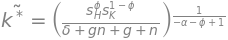

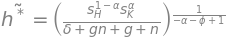

In [18]:
# Math printing
init_printing()

# Equation for capital per effective worker k_tilde^*
k_tilde_star = ((sK**(1-phi) * sH**phi) / (n + g + delta + n*g))**(1 / (1 - alpha - phi))

# Equation for human capital per effective worker h_tilde star
h_tilde_star = ((sK**alpha * sH**(1-alpha)) / (n + g + delta + n*g))**(1 / (1 - alpha - phi))

# Display the equations
k_tilde_star_eq = Eq(symbols(r'\tilde{k^*}'), k_tilde_star)
h_tilde_star_eq = Eq(symbols(r'\tilde{h^*}'), h_tilde_star)

# Print the equations with LaTeX
display(k_tilde_star_eq)
display(h_tilde_star_eq)

# Numerical analysis

## Steady state

### Introduction
We now have our model and estimates to find the steady state values for our 3 variables. We use our 3 defined equations and find use sympy to find the optimal values. The 3 variables are Capital accumulation, Human capital, and Output. We use two different methods to make sure we derive the right steady state.

In [19]:
# Defining parameters and parameter values
ss_func1 = sm.lambdify((sK,phi,sH,n,g,delta,alpha),k_tilde_star)
# Finding steady state for k_star
ss_func1(0.2,0.33,0.2,0.025,0.02,0.05,0.33)

In [20]:
# Defining parameters and parameter values
ss_func2 = sm.lambdify((sK,phi,sH,n,g,delta,alpha),h_tilde_star)
# Finding steady state for h_star
ss_func2(0.2,0.33,0.2,0.025,0.02,0.05,0.33)

In [21]:
# Defining the parameter values that will be needed for solving the model (included for introducing of taxes)
s_K, s_H, n, g, delta, nd, phi, alpha = sm.symbols('s_K s_H n g delta nd phi alpha')
s_K = 0.2
s_H = 0.2
alpha = 0.33
phi = 0.33
n = 0.025
g = 0.02
delta = 0.05
k0 = 1.0
h0 = 1.0
tau_K = 0.1
tau_H = 0.1

In [22]:
# Using root_scalar to find the steady state
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0)
result_k = root_scalar(model.obj_k_tilde, bracket=[0.1, 100], method='brentq')
result_h = root_scalar(model.obj_h_tilde, bracket=[0.1, 100], method='brentq')
result_y = root_scalar(model.obj_y_tilde, bracket=[0.1, 100], method='brentq')

# Print the steady state values
print('The steady state for k_tilde is', result_k.root)
print('The steady state for h_tilde is', result_h.root)
print('The steady state for y_tilde is', result_y.root)

The steady state for k_tilde is 8.594165217704218
The steady state for h_tilde is 8.594165217704218
The steady state for y_tilde is 4.135942011020154


### Conclusion

Thereby we have our 3 steady state solutions: $$\tilde{k}^\star = 8.794\\
\tilde{h}^\star = 8.794 \\
\tilde{y}^\star = 4.199$$

We see that $k^*$ and $h^*$ is the same value which makes sense because:
$$\alpha=\varphi \ ; \ s_H = s_K$$
Therefore we have the same steady state value for both human capital and capital accumulation. 

## Transition diagram and Phase diagram


### Introduction 

We will use a Transitions diagram to see the path human capital and capital accumulation takes over time. This is made with the given values from before. Afterwards we find $\Delta \tilde{k_t}=0$ and $\Delta \tilde{h_t}=0$ to make a phase diagram for the solow model with human capital.

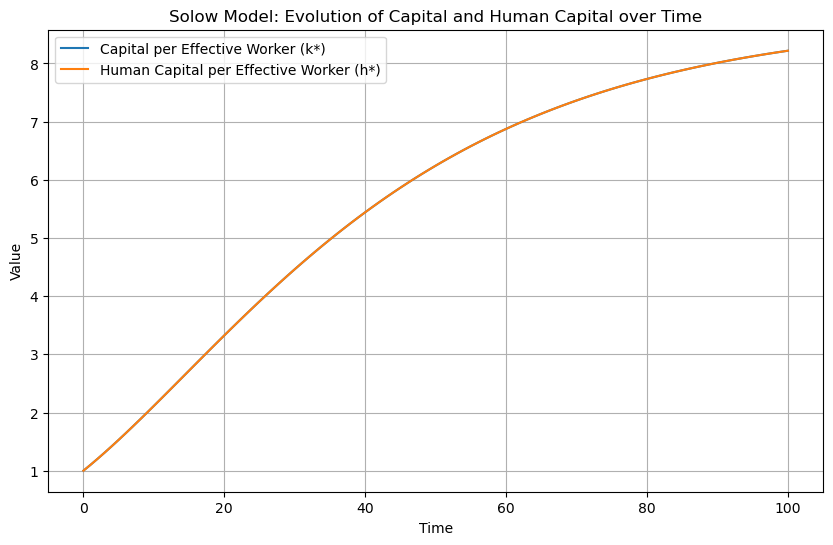

In [23]:
# Import py-file
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0)
# Number of periods for simulation
t = np.arange(0, 101)  

# Simulate the dynamics of capital and human capital over time
k_sol = np.zeros(len(t))
h_sol = np.zeros(len(t))
k_sol[0] = k0
h_sol[0] = h0

for i in range(1, len(t)):
    k_sol[i], h_sol[i] = model.solow_model_dynamics(k_sol[i-1], h_sol[i-1])

# Plot the evolution of capital and human capital over time
plt.figure(figsize=(10, 6))
plt.plot(t, k_sol, label='Capital per Effective Worker (k*)')
plt.plot(t, h_sol, label='Human Capital per Effective Worker (h*)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solow Model: Evolution of Capital and Human Capital over Time')
plt.legend()
plt.grid(True)
plt.show()




Then we use a Phasediagram to make a view for the steady state value and how the curves evolve throughout different values of k and h. We set both equations equal to H and rewriting. The equations start as:

$$
\Delta\tilde{k} = \frac{s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\phi} - (n + g + \delta + ng) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
\Delta\tilde{h} = \frac{s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\phi} - (n + g + \delta + ng) \tilde{h}_t}{(1 + n)(1 + g)}
$$

Then we isolate for h.
 $$\Delta\tilde{k}=\Delta\tilde{h}=0$$
$$
\tilde{h}_t = \left( \frac{n + g + \delta + ng}{s_K} \right)^\frac{1}{\phi}*{\tilde{k_t}^\frac{1-\alpha}{\phi}}, \ \ \ \ \ \ \ \ \Delta \tilde{k_t}=0$$


$$
\tilde{h}_t = \left( \frac{s_H}{n + g + \delta + ng} \right)^\frac{1}{1-\phi} \tilde{k_t}^\frac{\alpha}{1-\phi}, \ \ \ \ \ \ \ \ \Delta \tilde{h_t}=0$$
$$

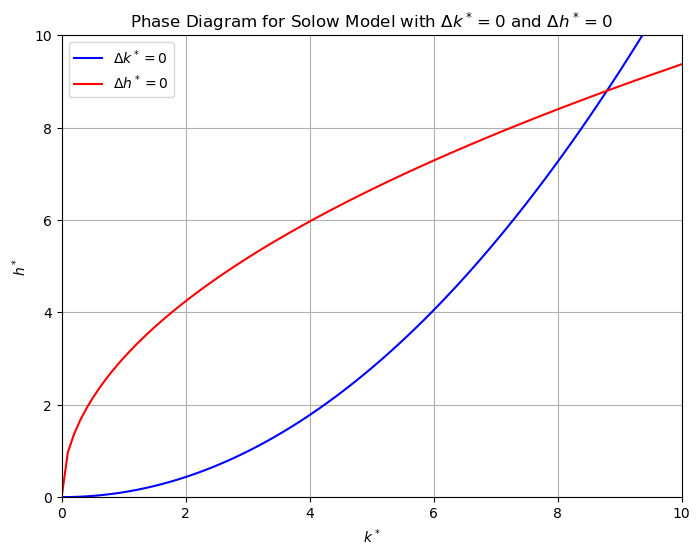

In [24]:
#Import of py-file
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0)
# Range of k* values
k_values = np.linspace(0, 10, 100)

# Calculate the corresponding h* values for delta_k_zero and delta_h_zero
h_delta_k_zero_values = [model.h_steady_state_delta_k_zero(k) for k in k_values]
h_delta_h_zero_values = [model.h_steady_state_delta_h_zero(k) for k in k_values]

# Plot the phase diagram
plt.figure(figsize=(8, 6))
plt.plot(k_values, h_delta_k_zero_values, label=r'$\Delta k^* = 0$', color='blue')
plt.plot(k_values, h_delta_h_zero_values, label=r'$\Delta h^* = 0$', color='red')
plt.xlabel(r'$k^*$')
plt.ylabel(r'$h^*$')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
plt.legend()
plt.grid(True)
plt.show()



### Conclusion
We observe that human capital and physical capital follow the same trajectory in the transition diagram, which is expected given the same savings rate. Both types of capital shows diminishing returns, aligning with economic theory. The phase diagram shows that $\Delta \tilde{h_t}$ rises fast with low input of k but afterward the rate of growth slows down. Whereas $\Delta \tilde{k_t}$ has a slow rate of growth with low $k^*$ but rises increasingly the higher $k^*$ gets. Steady state is represented by the intersection point, which is given by 8.794 for both capitals.

# Further analysis

## Sensitivity analysis

### Introduction - Transitiondiagram

To make a further analysis we take a look at what will happen when we have different estimates for $s_K$ or $s_H$. Which is interesting because k and h then will evolve differently over time. We use it as a sensitivity analysis by changing the parameter values little by little. The changes and sensitivity is shown in a transition diagram.

In [25]:
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0)

def interactive_plot(s_K, s_H):
    # Update the model's savings rates
    model.s_K = s_K
    model.s_H = s_H

    # Simulate the Solow model
    T = 100
    k_values, h_values = model.simulate_solow_model(T)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(k_values, label='Capital per Effective Worker (k*)')
    ax.plot(h_values, label='Human Capital per Effective Worker (h*)')

    ax.set_title('Solow Model Transitions')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
s_K_slider = widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.2, description='s_K')
s_H_slider = widgets.FloatSlider(min=0.1, max=0.5, step=0.01, value=0.2, description='s_H')

# Display interactive plot
ui = widgets.VBox([s_K_slider, s_H_slider])
out = widgets.interactive_output(interactive_plot, {'s_K': s_K_slider, 's_H': s_H_slider})

display(ui, out)




Output()

### Conclusion
Then we see that the effect is much larger on the $k^*$ variable when $s_K$ is bigger in the phasediagram. Although we see that h* also increases when $s_K$ increases, but not as much as $k^*$. The $k^*$ is directly changed by the higher savings rate, but $h^*$ is only indirectly affected and therefore we see the increasing distance between the two values. The effects is reversed for changes in $s_H$.

### Introduction - Phasediagram
Then we make a interactive diagram, where we can simulate shocks to the economy by making a change in the savings rate for $s_K$ or $s_K$. The phasediagram shows how the steady state will change with different savings values and how the phasediagram equations move.

In [26]:
def plot_phase_diagram(s_K, s_H):
    # Update the model's savings rates
    model.s_K = s_K
    model.s_H = s_H

    # Range of k* values
    k_values = np.linspace(0, 25, 500)  

    # Calculate h* values for delta_k_zero and delta_h_zero
    h_delta_k_zero_values = [model.h_steady_state_delta_k_zero(k) for k in k_values]
    h_delta_h_zero_values = [model.h_steady_state_delta_h_zero(k) for k in k_values]

    # Plot the phase diagram
    plt.figure(figsize=(10, 8))
    plt.plot(k_values, h_delta_k_zero_values, label=r'$\Delta k^* = 0$', color='blue')
    plt.plot(k_values, h_delta_h_zero_values, label=r'$\Delta h^* = 0$', color='red')
    plt.xlabel(r'$k^*$')
    plt.ylabel(r'$h^*$')
    plt.ylim(0, 25)
    plt.xlim(0, 25)
    plt.title('Phase Diagram for Solow Model with $\Delta k^* = 0$ and $\Delta h^* = 0$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive plot
interact(plot_phase_diagram,
         s_K=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_K'),
         s_H=FloatSlider(min=0.1, max=1.0, step=0.01, value=0.2, description='s_H'))


interactive(children=(FloatSlider(value=0.2, description='s_K', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

<function __main__.plot_phase_diagram(s_K, s_H)>

### Conclusion 



# Extension - Humancapital with tax

### Introduction

Then we add tax to the savings rates and analyze how that will impact the steady state and transition diagram. Firstly we find the new steady state for the model with tax. Secondly we observe the change it has made in the transition diagram. Thirdly we compare the phasediagram for before and after introduction of taxes.

In [27]:

# Create an instance of the SolowModel
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0, tau_K, tau_H)

# Use root_scalar to find the root of the effective objective functions
ef_result_k = root_scalar(model.ef_obj_k_tilde, bracket=[0.1, 100], method='brentq')
ef_result_h = root_scalar(model.ef_obj_h_tilde, bracket=[0.1, 100], method='brentq')
ef_result_y = root_scalar(model.ef_obj_y_tilde, bracket=[0.1, 100], method='brentq')

# Print the steady-state values considering taxes
print('The effective steady state for k_tilde is', ef_result_k.root)
print('The effective steady state for h_tilde is', ef_result_h.root)
print('The effective steady state for y_tilde is', ef_result_y.root)

The effective steady state for k_tilde is 6.304096375054219
The effective steady state for h_tilde is 6.304096375054219
The effective steady state for y_tilde is 3.370940422772047


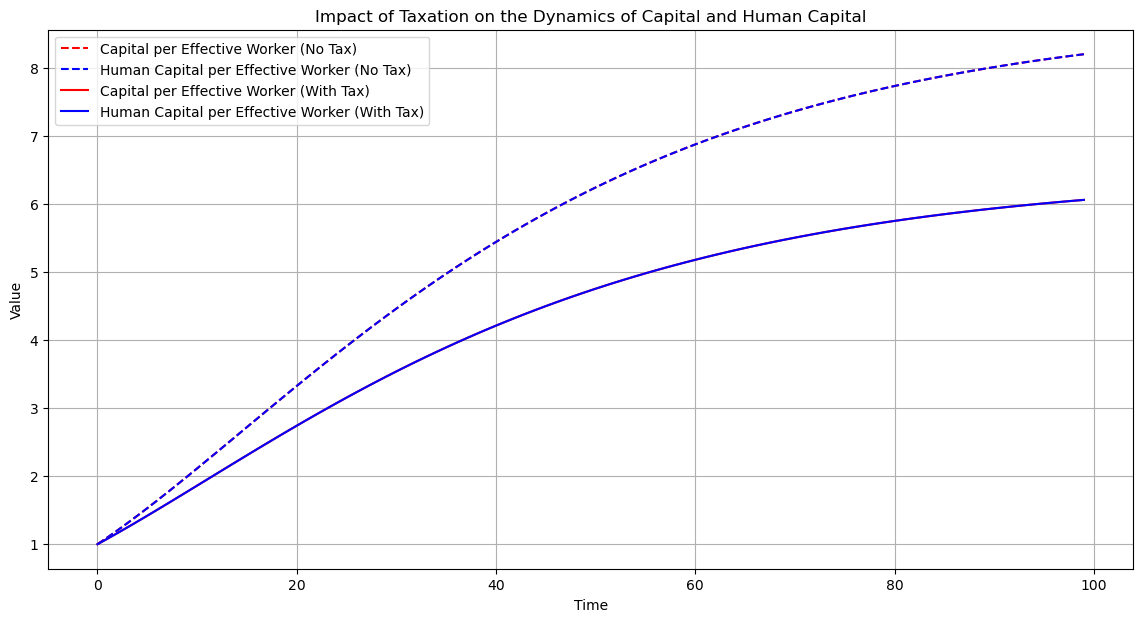

In [28]:
# Create an instance of the SolowModel
model = SolowModel(s_K, s_H, alpha, phi, n, g, delta, k0, h0, tau_K, tau_H)

# Parameters
T = 100

# Simulate without tax
k_values_no_tax, h_values_no_tax = model.simulate_solow_model_no_tax(T)

# Simulate with tax
k_values_with_tax, h_values_with_tax = model.ef_simulate_solow_model(T)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(k_values_no_tax, label='Capital per Effective Worker (No Tax)', color='red', linestyle='--')
plt.plot(h_values_no_tax, label='Human Capital per Effective Worker (No Tax)', color='blue', linestyle='--')
plt.plot(k_values_with_tax, label='Capital per Effective Worker (With Tax)', color='red')
plt.plot(h_values_with_tax, label='Human Capital per Effective Worker (With Tax)', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Impact of Taxation on the Dynamics of Capital and Human Capital')
plt.legend()
plt.grid(True)
plt.show()



### Conclusion and Comparison

Steady state differences: We see that all the steady states decrease with more than 10% (the tax) because we have spillover effects and therefore will the steady values drop lower than in the model without tax. All other parameter estimates is the same.

Transitiondiagram differences: 

Phasediagram differences: 

# Conclusion

In this paper we use a solow-model with human capital, which makes two different savings. Where we have savings for capital and for human capital. We see with the same savings values then the steady state values will remain the same, but if we get different savings rates, then steady state values will differ. Then we used a interactive diagram to see the impact of savings to the transition diagram. Afterwards we analyzed the changes in saving rates effect on steady state in the phase diagram, where we observe that $s_H$ only impacts $\Delta \tilde{h^*}$ and vice versa. 

Thereafter, we made an extension to the model by including tax, where the conclusion was that the steady state values would drop more than 10 percent (which was the tax value). We also saw that tax will make a bigger difference in the phase diagram when time is higher because the accumulation of capital and human capital has an impact on the transition evolvement.

In general this was a study of the human capital Solow model with different savings rate, where we studied what impact different changes to savings had on steady state and the development through time. At last we made a extension to the model by examine the impact of adding taxes to the model and comparing the results to the Solow model without taxes.